In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score

#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense


from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

import pickle

# Load prepared data

In [2]:
dir_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/"
# dir_path = "/Users/mriworkshop/Documents/TDCS/code/tdcs_thesis/"
save_path = dir_path+"data/raw/"
img_path =  dir_path+"data/processed/"
model_path = dir_path+"models/"

## fmap mean all experiments

In [3]:
file_mean = save_path+"fmap_mean_erode.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory']
data = np.loadtxt(file_mean);

In [4]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})
df

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5046267,35,5,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0
5046268,35,5,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0
5046269,35,5,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0
5046270,35,5,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5046272 entries, 0 to 5046271
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   mean0     float64
 6   mean1     float64
 7   mean2     float64
 8   mean3     float64
 9   mean4     float64
 10  theory    float64
dtypes: float64(6), int64(5)
memory usage: 423.5 MB


# Split data

## Data 1. fmap mean all experiments

In [6]:
df1_train = df[~((df['exp']==36) & ((df['mini_exp']==5) | (df['mini_exp']==6)))]
df1_val =  df[(df['exp']==36) & (df['mini_exp']==5)]
df1_test =  df[(df['exp']==36) & (df['mini_exp']==6)]

In [7]:
print(df1_train.shape)
print(df1_val.shape)
print(df1_test.shape)

(4685824, 11)
(180224, 11)
(180224, 11)


In [8]:
X1_train = df1_train.iloc[:, 5:-1].values 
y1_train = df1_train['theory'].values

X1_test = df1_val.iloc[:, 5:-1].values 
y1_test = df1_val['theory'].values

X1_pred = df1_test.iloc[:, 5:-1].values 
y1_pred = df1_val['theory'].values

In [9]:
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)
print(X1_pred.shape)
print(y1_pred.shape)

(4685824, 5)
(4685824,)
(180224, 5)
(180224,)
(180224, 5)
(180224,)


## Data2: One experiment

In [10]:
df_train = df[(df['exp']==36) & (df['mini_exp']!=6)]
df_test = df[(df['exp']==36) & (df['mini_exp']==6)]

## Data4: None zero

In [11]:
df_nonzero = df[(df['mean0']!=0.0) & (df['mean1']!=0.0) & (df['mean2']!=0.0) & (df['mean3']!=0.0) & (df['mean4']!=0.0)]

In [12]:
df_nonzero

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
34920,36,1,8,33,40,17.758072,3.100749,-27.108955,-54.541569,-65.580933,6.323732
34921,36,1,8,33,41,-171.797119,-187.157349,-216.839035,-243.115356,-255.319305,5.692159
34922,36,1,8,33,42,-384.395447,-400.023895,-428.779266,-454.553436,-467.434479,5.156662
34923,36,1,8,33,43,-597.038513,-613.454895,-641.396118,-666.766907,-679.730591,4.694756
34959,36,1,8,34,15,-1179.840454,-1197.678955,-1222.885254,-1246.201660,-1258.513672,3.883065
...,...,...,...,...,...,...,...,...,...,...,...
5003809,35,5,33,40,33,-233.451859,-219.373581,-219.398911,-222.292938,-216.633850,20.445215
5003810,35,5,33,40,34,-249.901581,-236.660583,-236.275848,-238.081451,-233.357391,15.309294
5003811,35,5,33,40,35,-230.639755,-218.042419,-217.110458,-218.660629,-214.294983,12.231406
5003812,35,5,33,40,36,-186.973434,-174.493347,-173.302063,-174.678192,-170.903381,10.196120


In [13]:
df4_train = df_nonzero[~((df_nonzero['exp']==36) & ((df_nonzero['mini_exp']==6) | (df_nonzero['mini_exp']==5)))]
df4_test =  df_nonzero[(df_nonzero['exp']==36) & (df_nonzero['mini_exp']==5)]
df4_pred =  df_nonzero[(df_nonzero['exp']==36) & (df_nonzero['mini_exp']==6)]

In [14]:
X4_train = df4_train.iloc[:, 5:-1].values
y4_train = df4_train['theory'].values

X4_test = df4_test.iloc[:, 5:-1].values
y4_test = df4_test['theory'].values

X4_pred = df4_pred.iloc[:, 5:-1].values
y4_pred = df4_pred['theory'].values

In [25]:
# X = df_nonzero.iloc[:, 5:-1].values
# y = df_nonzero['theory'].values

# X4_train, X4_test, y4_train, y4_test = train_test_split(
#     X, y, test_size=0.3, random_state=0)

In [15]:
# print(X.shape)
# print(y.shape)
print(X4_train.shape)
print(y4_train.shape)
print(X4_test.shape)
print(y4_test.shape)
print(X4_pred.shape)
print(y4_pred.shape)

(694168, 5)
(694168,)
(27092, 5)
(27092,)
(27093, 5)
(27093,)


# Include zero 32 to 38

In [18]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test = y1_test

In [55]:
shape = (len(X_train[0]),)
model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=shape)) 
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adamax', loss='mse', metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=[X_test, y_test])

Epoch 1/100
146432/146432 [==============================] - 151s 1ms/step - loss: 36.2151 - accuracy: 0.6203 - val_loss: 9.9205 - val_accuracy: 0.8495
Epoch 2/100
146432/146432 [==============================] - 144s 983us/step - loss: 5.7961 - accuracy: 0.8515 - val_loss: 6.5620 - val_accuracy: 0.8495
Epoch 3/100
146432/146432 [==============================] - 1914s 13ms/step - loss: 5.0681 - accuracy: 0.8515 - val_loss: 5.7479 - val_accuracy: 0.8496
Epoch 4/100
146432/146432 [==============================] - 1974s 13ms/step - loss: 4.8988 - accuracy: 0.8515 - val_loss: 4.3896 - val_accuracy: 0.8496
Epoch 5/100
146188/146432 [============================>.] - ETA: 1s - loss: 4.8279 - accuracy: 0.8515

In [25]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

146432/146432 [==============================] - 137s 936us/step
3.2354468354632684
0.9637363904443507
5632/5632 [==============================] - 5s 917us/step
1.2306223508579905
0.8838840037078277


In [26]:
model.evaluate(X_test, y_test)

5632/5632 [==============================] - 6s 1ms/step - loss: 1.2306 - accuracy: 0.8495


[1.2306078672409058, 0.8495372533798218]

In [27]:
np.corrcoef(test_pred.flatten(), y_test)

array([[1.        , 0.98032509],
       [0.98032509, 1.        ]])

In [28]:
model.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_325 (Dense)           (None, 7)                 42        
                                                                 
 dense_326 (Dense)           (None, 7)                 56        
                                                                 
 dense_327 (Dense)           (None, 7)                 56        
                                                                 
 dense_328 (Dense)           (None, 7)                 56        
                                                                 
 dense_329 (Dense)           (None, 7)                 56        
                                                                 
 dense_330 (Dense)           (None, 1)                 8         
                                                                 
Total params: 274
Trainable params: 274
Non-trainable

In [29]:
history.history

NameError: name 'history' is not defined

In [ ]:
file = img_path+'model_32to38_erode.sav'
pickle.dump(model, open(file, 'wb'))

In [21]:
file = model_path+'model_32to38_erode.sav'
model = pickle.load(open(file, 'rb'))
result = model.evaluate(X_test, y_test)
print(result)

5632/5632 [==============================] - 6s 1ms/step - loss: 1.2306 - accuracy: 0.8495
[1.2306078672409058, 0.8495372533798218]


## Plot

### Loss function (MSE)

In [ ]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

In [ ]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

r: 0.98033, st_er: 0.000460
y = 0.97*x + -0.0149


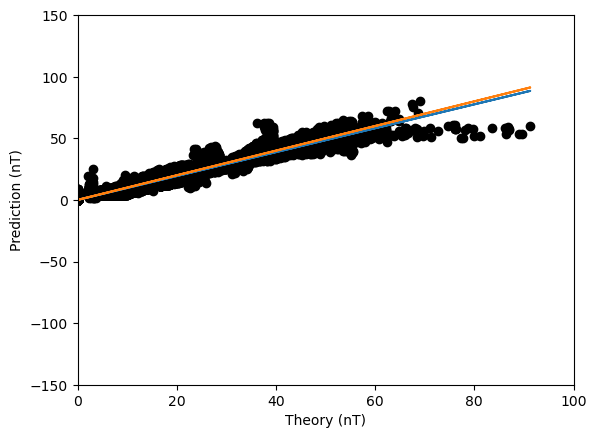

In [30]:
x = y_test.flatten()
y = test_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred,  color='black')
plt.axis([0,100, -150, 150])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
# plt.title("Neural Network Prediction vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output data

In [22]:
test_pred = model.predict(X1_pred)

5632/5632 [==============================] - 6s 980us/step


In [23]:
df_test

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
901120,36,6,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
901121,36,6,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
901122,36,6,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
901123,36,6,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
901124,36,6,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1081339,36,6,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0
1081340,36,6,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0
1081341,36,6,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0
1081342,36,6,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_test['predict'] = test_pred

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_8685/4195812830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = test_pred


In [ ]:
np.savetxt(img_path+"nn_32to38_erode.txt", df_test[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [ ]:
df_test

# Nonzero 32 to 38

In [40]:
X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test = y4_test

In [41]:
shape = (len(X_train[0]),)
model = keras.Sequential()
model.add(Dense(4, activation='relu', input_shape=shape)) 
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='RMSprop', loss='mse', metrics=["accuracy"])

In [42]:
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=[X_test, y_test])

Epoch 1/300
21693/21693 [==============================] - 24s 1ms/step - loss: 56.5412 - accuracy: 2.5930e-05 - val_loss: 61.8884 - val_accuracy: 0.0000e+00
Epoch 2/300
21693/21693 [==============================] - 23s 1ms/step - loss: 38.4112 - accuracy: 0.0000e+00 - val_loss: 55.2991 - val_accuracy: 0.0000e+00
Epoch 3/300
21693/21693 [==============================] - 22s 1ms/step - loss: 32.6095 - accuracy: 2.8811e-06 - val_loss: 48.7637 - val_accuracy: 0.0000e+00
Epoch 4/300
21693/21693 [==============================] - 22s 1ms/step - loss: 33.1211 - accuracy: 4.3217e-06 - val_loss: 37.1034 - val_accuracy: 7.3823e-05
Epoch 5/300
21693/21693 [==============================] - 22s 1ms/step - loss: 31.0799 - accuracy: 4.1056e-04 - val_loss: 23.6111 - val_accuracy: 7.3823e-05
Epoch 6/300
21693/21693 [==============================] - 22s 1ms/step - loss: 29.8938 - accuracy: 3.7455e-04 - val_loss: 18.6691 - val_accuracy: 0.0000e+00
Epoch 7/300
21693/21693 [===========================

21693/21693 [==============================] - 20s 929us/step - loss: 27.3722 - accuracy: 8.6434e-06 - val_loss: 20.2302 - val_accuracy: 0.0000e+00
Epoch 104/300
21693/21693 [==============================] - 20s 931us/step - loss: 27.2257 - accuracy: 1.5846e-05 - val_loss: 19.7344 - val_accuracy: 0.0000e+00
Epoch 105/300
21693/21693 [==============================] - 20s 933us/step - loss: 27.0455 - accuracy: 2.0168e-05 - val_loss: 23.2572 - val_accuracy: 4.4294e-04
Epoch 106/300
21693/21693 [==============================] - 20s 928us/step - loss: 26.9399 - accuracy: 1.2965e-05 - val_loss: 20.8298 - val_accuracy: 0.0000e+00
Epoch 107/300
21693/21693 [==============================] - 20s 930us/step - loss: 26.8767 - accuracy: 8.6434e-06 - val_loss: 19.8803 - val_accuracy: 0.0000e+00
Epoch 108/300
21693/21693 [==============================] - 21s 981us/step - loss: 26.9007 - accuracy: 2.5930e-05 - val_loss: 21.7582 - val_accuracy: 0.0000e+00
Epoch 109/300
21693/21693 [===============

Epoch 154/300
21693/21693 [==============================] - 20s 934us/step - loss: 26.0440 - accuracy: 0.0000e+00 - val_loss: 29.6051 - val_accuracy: 0.0000e+00
Epoch 155/300
21693/21693 [==============================] - 20s 935us/step - loss: 26.1490 - accuracy: 5.7623e-06 - val_loss: 21.7328 - val_accuracy: 0.0000e+00
Epoch 156/300
21693/21693 [==============================] - 20s 931us/step - loss: 26.2349 - accuracy: 1.4406e-06 - val_loss: 25.6620 - val_accuracy: 0.0000e+00
Epoch 157/300
21693/21693 [==============================] - 20s 930us/step - loss: 26.0752 - accuracy: 0.0000e+00 - val_loss: 23.1926 - val_accuracy: 0.0000e+00
Epoch 158/300
21693/21693 [==============================] - 20s 932us/step - loss: 26.1169 - accuracy: 4.3217e-06 - val_loss: 21.5440 - val_accuracy: 0.0000e+00
Epoch 159/300
21693/21693 [==============================] - 20s 930us/step - loss: 26.1880 - accuracy: 5.7623e-06 - val_loss: 22.6154 - val_accuracy: 0.0000e+00
Epoch 160/300
21693/21693 [=

21693/21693 [==============================] - 20s 940us/step - loss: 24.6081 - accuracy: 0.0000e+00 - val_loss: 13.8228 - val_accuracy: 0.0000e+00
Epoch 255/300
21693/21693 [==============================] - 21s 966us/step - loss: 24.5765 - accuracy: 0.0000e+00 - val_loss: 15.1953 - val_accuracy: 0.0000e+00
Epoch 256/300
21693/21693 [==============================] - 20s 924us/step - loss: 24.5608 - accuracy: 0.0000e+00 - val_loss: 12.5953 - val_accuracy: 0.0000e+00
Epoch 257/300
21693/21693 [==============================] - 20s 930us/step - loss: 24.5863 - accuracy: 0.0000e+00 - val_loss: 14.7386 - val_accuracy: 0.0000e+00
Epoch 258/300
21693/21693 [==============================] - 20s 922us/step - loss: 24.5978 - accuracy: 0.0000e+00 - val_loss: 16.5079 - val_accuracy: 0.0000e+00
Epoch 259/300
21693/21693 [==============================] - 20s 921us/step - loss: 24.6075 - accuracy: 0.0000e+00 - val_loss: 11.9504 - val_accuracy: 0.0000e+00
Epoch 260/300
21693/21693 [===============

In [43]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

21693/21693 [==============================] - 14s 650us/step
23.86287321177594
0.28349644939505547
847/847 [==============================] - 1s 686us/step
16.717735373398167
0.25293886363821316


In [44]:
model.evaluate(X_test, y_test)

847/847 [==============================] - 1s 745us/step - loss: 16.7177 - accuracy: 0.0000e+00


[16.717744827270508, 0.0]

In [45]:
np.corrcoef(test_pred.flatten(), y_test)

array([[1.        , 0.92684955],
       [0.92684955, 1.        ]])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 24        
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [47]:
history.history

{'loss': [56.54118347167969,
  38.41116714477539,
  32.60953140258789,
  33.12107467651367,
  31.079879760742188,
  29.89383888244629,
  29.28240203857422,
  28.90797233581543,
  28.721778869628906,
  28.551286697387695,
  28.27004051208496,
  28.205812454223633,
  28.363056182861328,
  28.277292251586914,
  29.697423934936523,
  31.183786392211914,
  30.978883743286133,
  28.89061737060547,
  28.443416595458984,
  28.24422264099121,
  28.2391357421875,
  28.157590866088867,
  28.40365982055664,
  31.864931106567383,
  31.504379272460938,
  31.24102210998535,
  30.925527572631836,
  30.512393951416016,
  30.228275299072266,
  29.7933349609375,
  29.508548736572266,
  29.26092529296875,
  30.742263793945312,
  30.560935974121094,
  29.844406127929688,
  29.342199325561523,
  28.70579719543457,
  28.519176483154297,
  28.411958694458008,
  28.299179077148438,
  27.763351440429688,
  27.69214630126953,
  27.628875732421875,
  27.593780517578125,
  27.57196807861328,
  27.461898803710938,


In [48]:
file = model_path+'model_nonzero_32to38_5layer4unit_erode.sav'
pickle.dump(model, open(file, 'wb'))

INFO:tensorflow:Assets written to: ram:///var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/tmpzxpd1ayn/assets


In [ ]:
model.save(model_path)

In [21]:
load_model = pickle.load(open(file, 'rb'))
result = load_model.evaluate(X_test, y_test)
print(result)

1063/1063 [==============================] - 1s 842us/step - loss: 56.8737 - accuracy: 8.8204e-04
[56.87367630004883, 0.0008820416405797005]


## Plot

### Loss function (MSE)

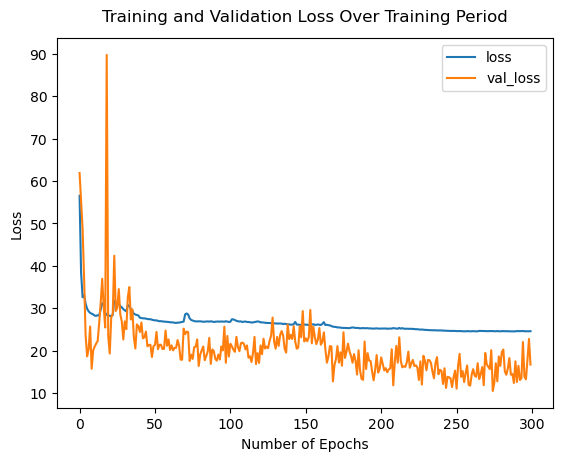

In [49]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

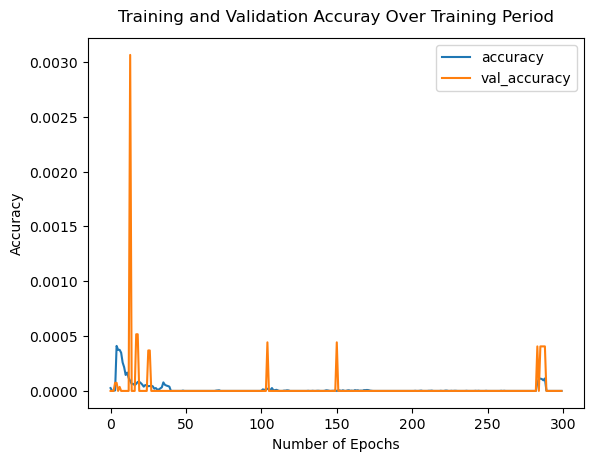

In [50]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

r: 0.92685, st_er: 0.001797
y = 0.7301*x + 2.1162


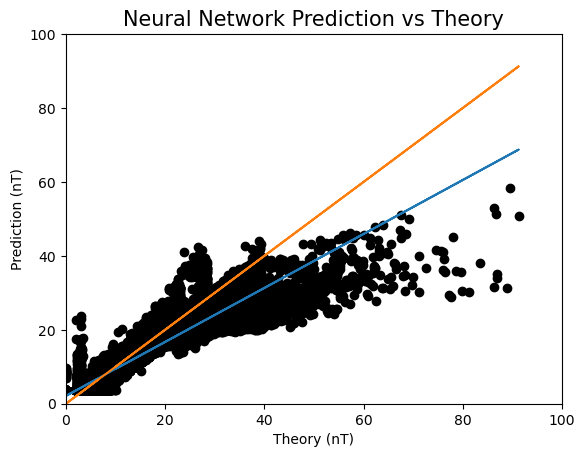

In [51]:
x = y_test.flatten()
y = test_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
plt.title("Neural Network Prediction vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output data

In [52]:
test_pred = model.predict(X4_pred)

847/847 [==============================] - 1s 762us/step


In [53]:
df4_pred['predict'] = test_pred

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_61444/2364276288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_pred['predict'] = test_pred


In [54]:
df4_pred

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory,predict
936040,36,6,8,33,40,-281.228516,-281.580200,-298.687897,-313.737274,-312.011200,6.323732,8.325517
936041,36,6,8,33,41,-470.337860,-472.075500,-488.780823,-502.790314,-501.399567,5.692159,6.601041
936042,36,6,8,33,42,-681.214478,-683.935608,-700.522400,-713.198364,-711.765076,5.156662,4.904526
936043,36,6,8,33,43,-892.559753,-896.184509,-911.637207,-924.472595,-923.017944,4.694756,3.736446
936079,36,6,8,34,15,-1471.209351,-1475.378540,-1489.757202,-1499.828979,-1503.126099,3.883065,3.736446
...,...,...,...,...,...,...,...,...,...,...,...,...
1046804,36,6,35,36,20,-610.252991,-613.019775,-628.576294,-640.380493,-640.784180,6.022675,5.142720
1046805,36,6,35,36,21,-460.002319,-461.472900,-478.441254,-491.319244,-490.660767,6.719324,6.681411
1046806,36,6,35,36,22,-321.722260,-321.674591,-340.263275,-354.678894,-352.521301,7.573551,8.343787
1046807,36,6,35,36,23,-196.516602,-195.509140,-214.553329,-230.615768,-227.110611,8.658540,9.564516


In [55]:
df_test

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory,predict
901120,36,6,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
901121,36,6,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
901122,36,6,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
901123,36,6,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
901124,36,6,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1081339,36,6,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1081340,36,6,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1081341,36,6,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1081342,36,6,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df_test['predict'] = 0.00

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_61444/3257651465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = 0.00


In [57]:
df_out = df_test[['i', 'j', 'k', 'predict']]
df_pre = df4_pred[['i', 'j', 'k', 'predict']]

In [34]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180224 entries, 901120 to 1081343
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   i        180224 non-null  int64  
 1   j        180224 non-null  int64  
 2   k        180224 non-null  int64  
 3   predict  180224 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 6.9 MB


In [58]:
for x in range(len(df_pre)):
    i = df_pre.iloc[x, :]['i'].astype(int)
    j = df_pre.iloc[x, :]['j'].astype(int)
    k = df_pre.iloc[x, :]['k'].astype(int)
    pred = df_pre.iloc[x, :]['predict']
    idx = df_out[(df_out['i']==i) & (df_out['j']==j) & (df_out['k']==k)].index
    df_out.loc[idx, 'predict']= pred

In [59]:
df_pre

,i,j,k,predict
936040,8,33,40,8.325517
936041,8,33,41,6.601041
936042,8,33,42,4.904526
936043,8,33,43,3.736446
936079,8,34,15,3.736446
...,...,...,...,...
1046804,35,36,20,5.142720
1046805,35,36,21,6.681411
1046806,35,36,22,8.343787
1046807,35,36,23,9.564516


In [60]:
df_out[(df_out['i']==7) & (df_out['j']==32) & (df_out['k']==40)]

,i,j,k,predict
931880,7,32,40,0.0


In [38]:
df_out

,i,j,k,predict
901120,0,0,0,0.0
901121,0,0,1,0.0
901122,0,0,2,0.0
901123,0,0,3,0.0
901124,0,0,4,0.0
...,...,...,...,...
1081339,43,63,59,0.0
1081340,43,63,60,0.0
1081341,43,63,61,0.0
1081342,43,63,62,0.0


In [61]:
np.savetxt(img_path+"nn_nonzero_32to38_5layer4unit_erode.txt", df_out[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")